In [253]:

import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt

path_melb_data = r'C:\Users\aiden\Documents\GitHub\EDA_dashboard\melb_data.csv'
print(path_melb_data)


C:\Users\aiden\Documents\GitHub\EDA_dashboard\melb_data.csv


In [254]:
df = pd.read_csv(path_melb_data)

df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2,3067,...,1,1,202,NaN,NaN,Yarra,-38,145,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2,3067,...,1,0,156,79,1900,Yarra,-38,145,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2,3067,...,2,0,134,150,1900,Yarra,-38,145,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2,3067,...,2,1,94,NaN,NaN,Yarra,-38,145,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2,3067,...,1,2,120,142,2014,Yarra,-38,145,Northern Metropolitan,4019


# EDA #

### Data overview ###

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [256]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580,13580,13580,13580,13580,13580,13518,13580,7130,8205,13580,13580,13580
mean,3,1075684,10,3105,3,2,2,558,152,1965,-38,145,7454
std,1,639311,6,91,1,1,1,3991,541,37,0,0,4379
min,1,85000,0,3000,0,0,0,0,0,1196,-38,144,249
25%,2,650000,6,3044,2,1,1,177,93,1940,-38,145,4380
50%,3,903000,9,3084,3,1,2,440,126,1970,-38,145,6555
75%,3,1330000,13,3148,3,2,2,651,174,1999,-38,145,10331
max,10,9000000,48,3977,20,8,10,433014,44515,2018,-37,146,21650


In [257]:
col_names = df.columns
print(col_names)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [258]:
df.shape

(13580, 21)

In [259]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [260]:
df[df.duplicated()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [261]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [262]:
df.isna().sum().sum()

13256

In [263]:
round(df.isna().sum().sum() / df.size * 100, 1) 

4.6

In [264]:

missing_df = df[['Car','BuildingArea','YearBuilt','CouncilArea']]
missing_df.describe()


,Car,BuildingArea,YearBuilt
count,13518,7130,8205
mean,2,152,1965
std,1,541,37
min,0,0,1196
25%,1,93,1940
50%,2,126,1970
75%,2,174,1999
max,10,44515,2018


In [265]:
missing_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car           13518 non-null  float64
 1   BuildingArea  7130 non-null   float64
 2   YearBuilt     8205 non-null   float64
 3   CouncilArea   12211 non-null  object 
dtypes: float64(3), object(1)
memory usage: 424.5+ KB


In [266]:
missing_df['CouncilArea'].head()


0    Yarra
1    Yarra
2    Yarra
3    Yarra
4    Yarra
Name: CouncilArea, dtype: object

In [267]:
Council_vs_price = df[['Price','CouncilArea']].groupby('CouncilArea').mean()
Council_vs_price



,Price
CouncilArea,
Banyule,944428
Bayside,1652168
Boroondara,1647217
Brimbank,647201
Cardinia,573125
Casey,656408
Darebin,915800
Frankston,658985
Glen Eira,1069279


In [268]:
pd.options.display.float_format = '{:.0f}'.format

In [269]:
Council_vs_price = Council_vs_price.reset_index()
Council_vs_price = Council_vs_price.sort_values('Price')
Council_vs_price


,CouncilArea,Price
22,Moorabool,285000
19,Melton,499623
30,Wyndham,531813
11,Hume,561407
4,Cardinia,573125
29,Whittlesea,630756
14,Macedon Ranges,631571
3,Brimbank,647201
5,Casey,656408
7,Frankston,658985


In [270]:
%matplotlib inline

# Create the bar chart
fig = go.Figure(
    data=[
        go.Bar(
            x=Council_vs_price['CouncilArea'],
            y=Council_vs_price['Price'],
            marker_color='teal'
        )
    ]
)

# Customize layout
fig.update_layout(
    title='Average House Price by Council Area',
    xaxis_title='Council Area',
    yaxis_title='Average Price',
    xaxis_tickangle=-45,
    height=600,
    width=1000
)

fig.show()

In [271]:
avg_price = df['Price'].mean()
fig.add_hline(y=avg_price, line_width=3, line_dash="dash", line_color="red")
fig.show()

In [272]:

df_type_price = df[['Price','Type']].groupby('Type').mean()
df_type_price = df_type_price.reset_index()
print(df_type_price.columns)

Index(['Type', 'Price'], dtype='object')


In [273]:
# Create the bar chart
fig = go.Figure(
    data=[
        go.Bar(
            x=df_type_price['Type'],
            y=df_type_price['Price'],
            marker_color='teal'
        )
    ]
)

# Customize layout
fig.update_layout(
    title='Average House Price by Type',
    xaxis_title='Type',
    yaxis_title='Average Price',
    xaxis_tickangle=-45,
    height=600,
    width=1000
)

fig.show()

Next time - 
find out what house type means, plot descrete data,  look at correlations

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

<Axes: xlabel='Rooms', ylabel='Price'>

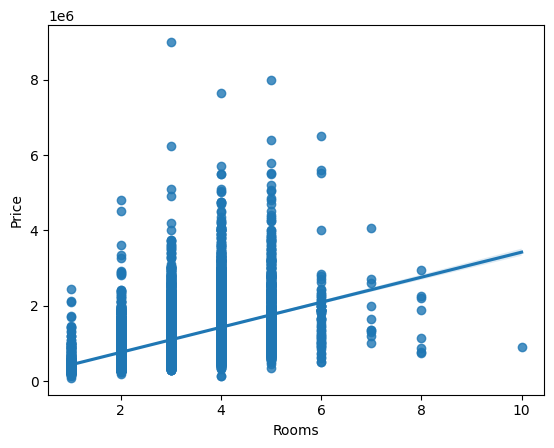

In [275]:
sns.regplot(x='Rooms',y='Price', data=df)


<Axes: xlabel='BuildingArea', ylabel='Price'>

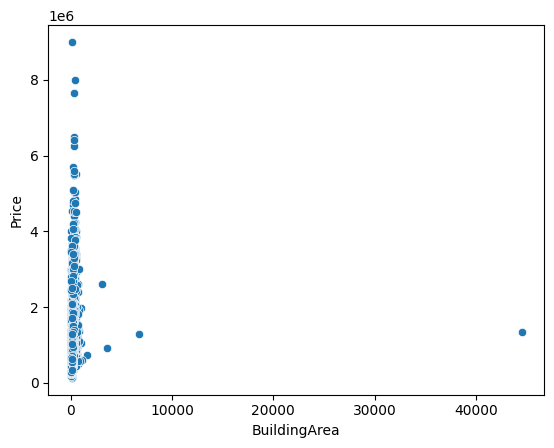

In [276]:
sns.scatterplot(x='BuildingArea',y='Price', data=df)

<Axes: xlabel='Landsize', ylabel='Price'>

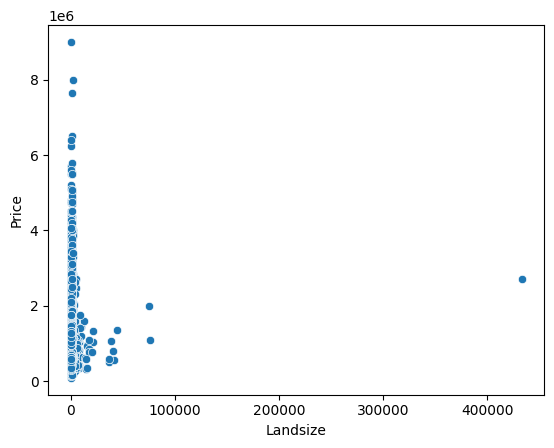

In [277]:
sns.scatterplot(x='Landsize',y='Price', data=df)

In [278]:
print(df.shape)
max_building_area = df['BuildingArea'].max()
df = df[df['BuildingArea'] < max_building_area]
print(df['BuildingArea'].max())
max_landsize = df['Landsize'].max()
df = df[df['Landsize'] < max_landsize]
print(df['Landsize'].max())
print(df.shape)

(13580, 21)
6791.0
21715.0
(7128, 21)


<Axes: xlabel='BuildingArea', ylabel='Price'>

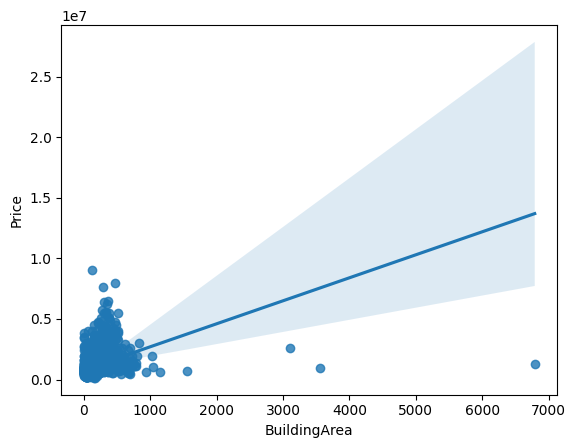

In [279]:
sns.regplot(x='BuildingArea',y='Price', data=df)

<Axes: xlabel='Landsize', ylabel='Price'>

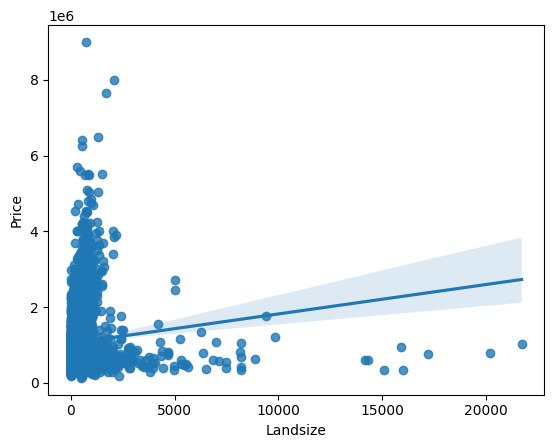

In [280]:
sns.regplot(x='Landsize',y='Price', data=df)

<Axes: xlabel='Bedroom2', ylabel='Price'>

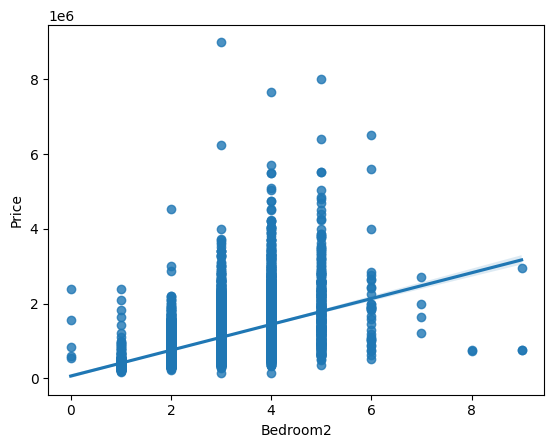

In [281]:
sns.regplot(x='Bedroom2',y='Price',data=df)

<Axes: xlabel='Bathroom', ylabel='Price'>

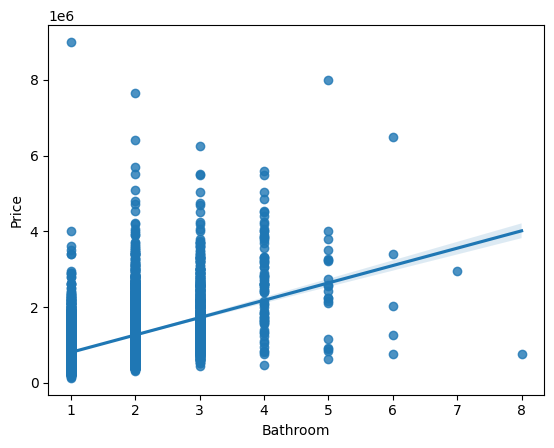

In [282]:
sns.regplot(x='Bathroom',y='Price',data=df)

<Axes: xlabel='Car', ylabel='Price'>

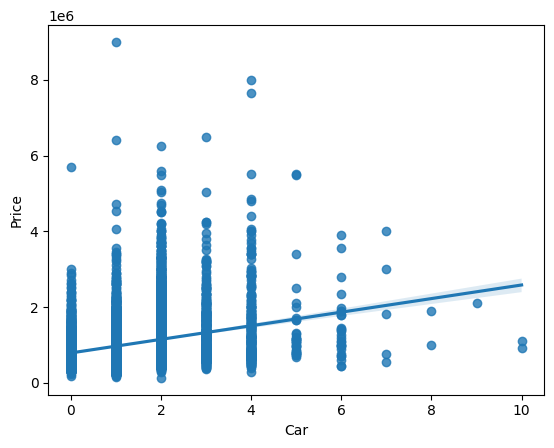

In [283]:
sns.regplot(x='Car',y='Price',data=df)

<Axes: xlabel='Propertycount', ylabel='Price'>

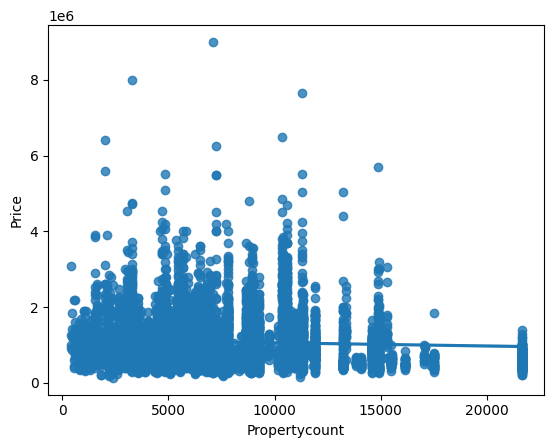

In [288]:
sns.regplot(x='Propertycount',y='Price',data=df)

In [289]:
print('Car column null count:',df['Car'].isnull().sum())
mean_car = df['Car'].mean()
mean_car = mean_car.round()
print('Car column average value:',mean_car)
df['Car'] = df['Car'].fillna(mean_car)
print('Car column null count:',df['Car'].isnull().sum())

Car column null count: 0
Car column average value: 2.0
Car column null count: 0


In [290]:
df.info()
df_num = df[['Rooms','Price','Bedroom2','Bathroom','Landsize','Car','Landsize']]

<class 'pandas.core.frame.DataFrame'>
Index: 7128 entries, 1 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         7128 non-null   object 
 1   Address        7128 non-null   object 
 2   Rooms          7128 non-null   int64  
 3   Type           7128 non-null   object 
 4   Price          7128 non-null   float64
 5   Method         7128 non-null   object 
 6   SellerG        7128 non-null   object 
 7   Date           7128 non-null   object 
 8   Distance       7128 non-null   float64
 9   Postcode       7128 non-null   float64
 10  Bedroom2       7128 non-null   float64
 11  Bathroom       7128 non-null   float64
 12  Car            7128 non-null   float64
 13  Landsize       7128 non-null   float64
 14  BuildingArea   7128 non-null   float64
 15  YearBuilt      6857 non-null   float64
 16  CouncilArea    6445 non-null   object 
 17  Lattitude      7128 non-null   float64
 18  Longtitude  